<a href="https://colab.research.google.com/github/Malakh101/Health-Insurance-Data-Science-Project/blob/main/Health_insurance_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
data=pd.read_csv('/content/health_insurance.csv')
data 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265
std,14.049960,6.098187,1.205493,0.403694,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

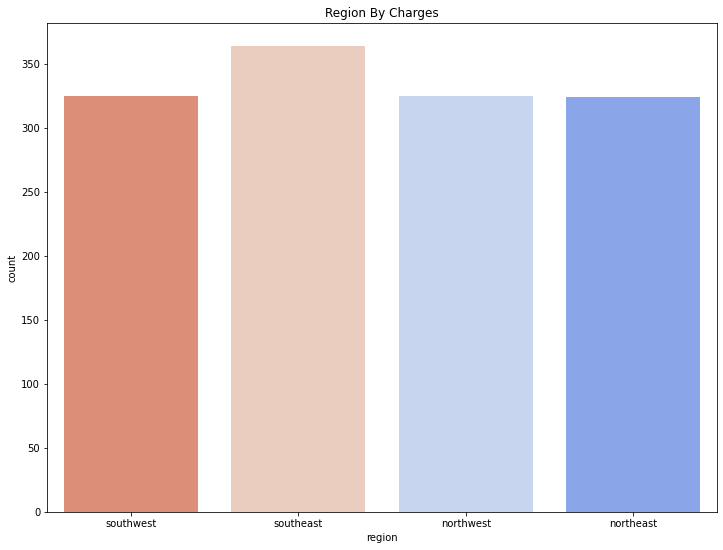

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Region By Charges')
sns.countplot(x='region', data= data, palette='coolwarm_r')

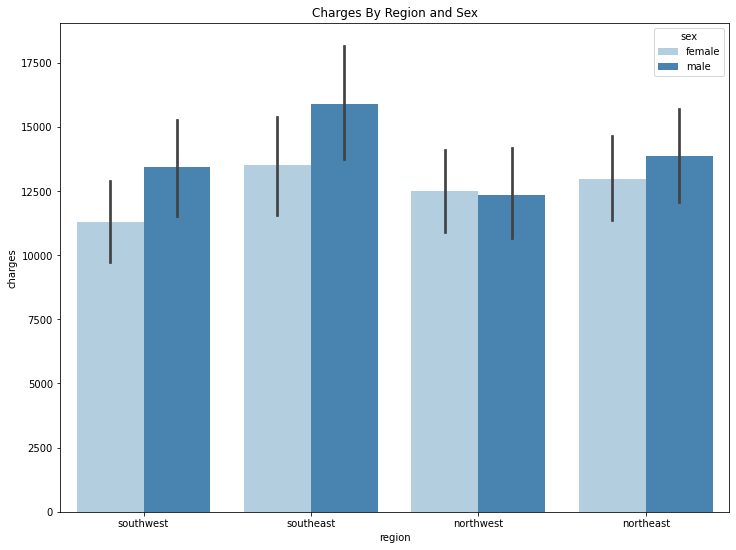

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Charges By Region and Sex')
sns.barplot(x='region', y='charges', hue='sex', data=data, palette='Blues')
plt.show()

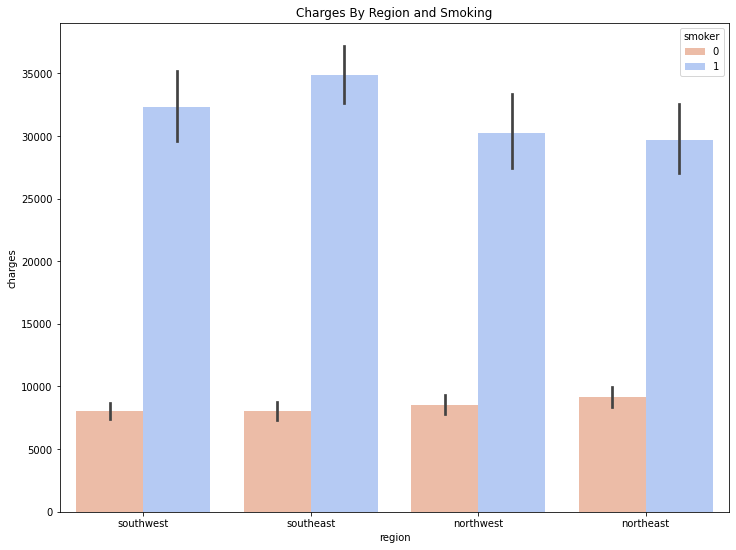

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Charges By Region and Smoking')
sns.barplot(x='region', y='charges', hue='smoker', data=data, palette='coolwarm_r')
plt.show()

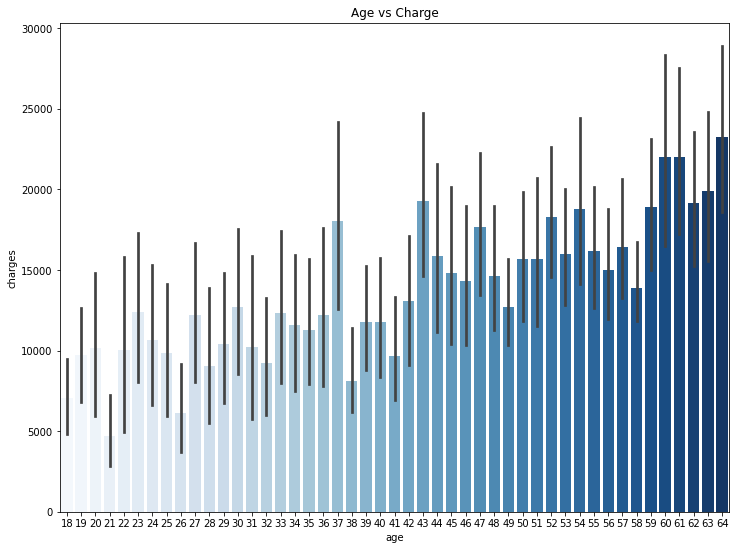

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data,palette='Blues')


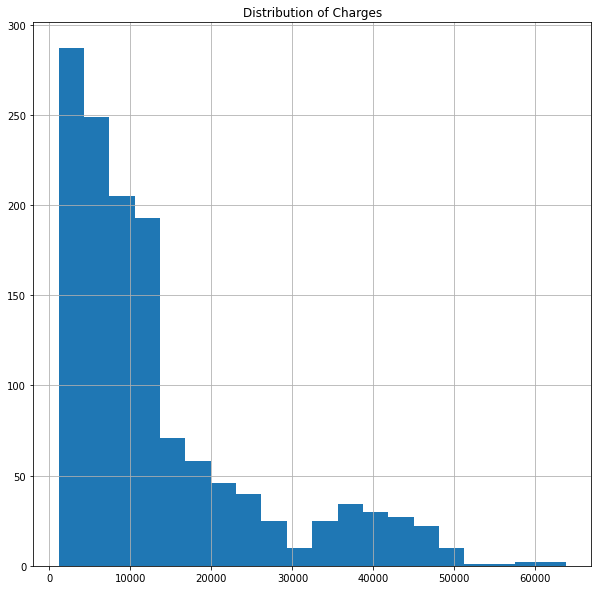

In [ ]:
plt.figure(figsize=(12,9))
plt.title("Distribution of Charges")
data.charges.hist(figsize=[10,10],bins=20)



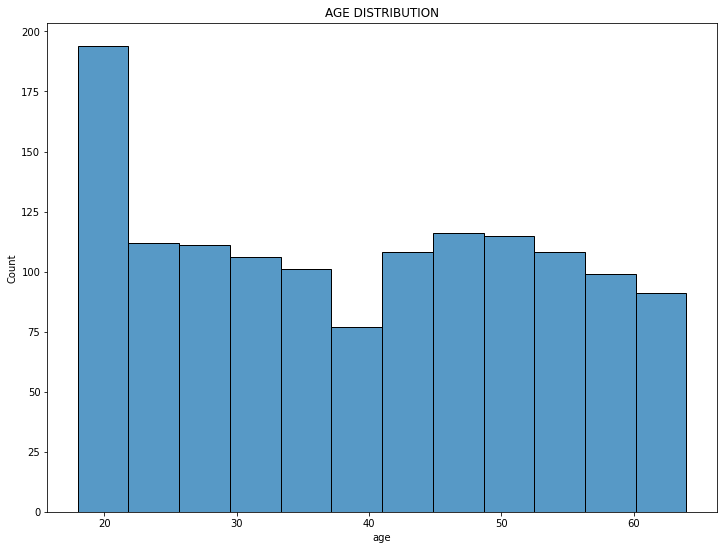

In [ ]:
plt.figure(figsize=(12,9))
plt.title('AGE DISTRIBUTION')
sns.histplot(x='age',data=data,palette='coolwarm')

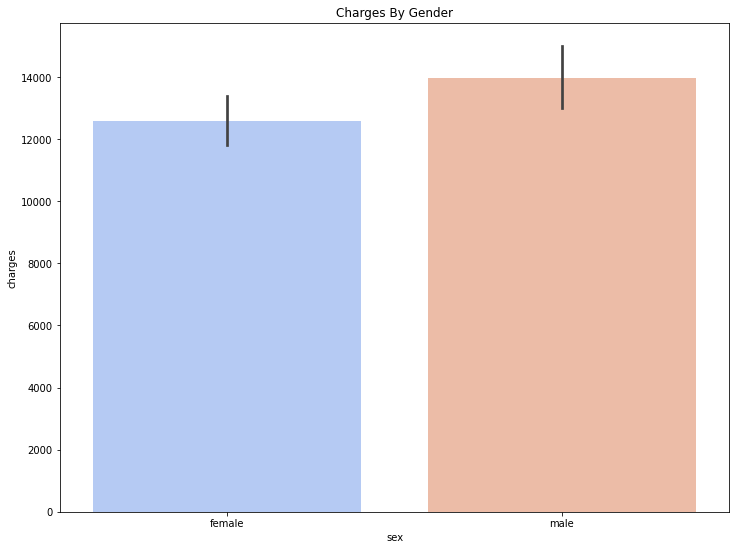

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Charges By Gender')
sns.barplot(x=data.sex,y= data.charges,data=data, palette='coolwarm')

In [ ]:
h_insurance=data.corr()
h_insurance

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


# This heatmap below shows the correlations between the different values and their relationships with each other
#The smoking features has the most correlation with charges with up to 0.79 correlation value
#The age and charges also have some correlation with a value of 0.3, followed closely by bmi with a value of 0.2

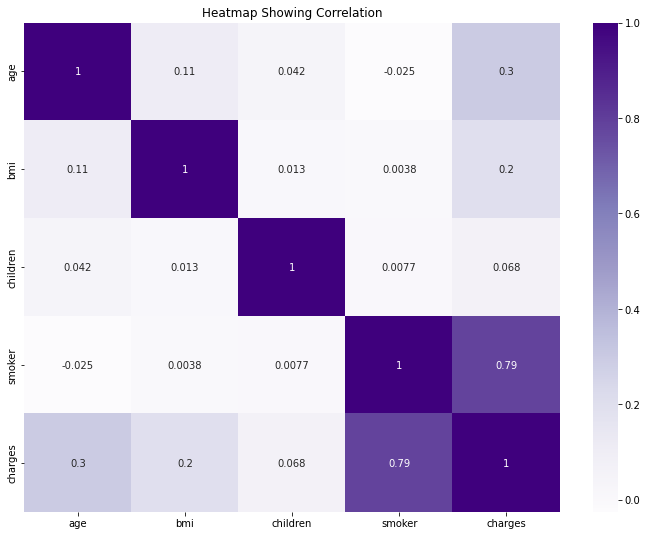

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Heatmap Showing Correlation')
sns.heatmap(data =h_insurance,annot=True,cmap="Purples")


#In the figure below, the yellow dots are for smokers, and the dark blue dots denoted non-smokers
#This figure shows that the charges and ages are correlated because the charges can be seen to generally increase
#with age. The correlation between smoking and charges is also very apparent here as the non-smokers(in dark blue)
#can be seen to have generally low charges at the bottom of the graph
#The highest charges are mostly for smokers as smoking is a factor that can cause severity of illness.


In [ ]:
px.scatter(data,
           x='age',
           y='charges',
           color='smoker',
           opacity=0.9,
           ,
           title='Scatter Plot of Charges and Age',
           )



# Generally, it can be observed that patients with bmi over than 30 have an increased medical charges, which makes sense because an increased bmi translates to weight-related illness, which could cause an increase in charges

In [ ]:
 px.scatter(data, 
                 x='bmi', 
                 y='charges',  
                 opacity=0.9, 
                 title='Scatter Plot of Bmi and Charges')
 

# 'no' is denoted as 0 and 'yes' is denoted with 1
## This shows that majority of the patient's data are non-smokers


In [ ]:
data.smoker.value_counts()


0    1064
1     274
Name: smoker, dtype: int64

#While the majority of the patients are non-smokers, the visual below shows a representation of how the charges is affected by smoking, since the smokers clearly have an obvious rise in charges of medical cost

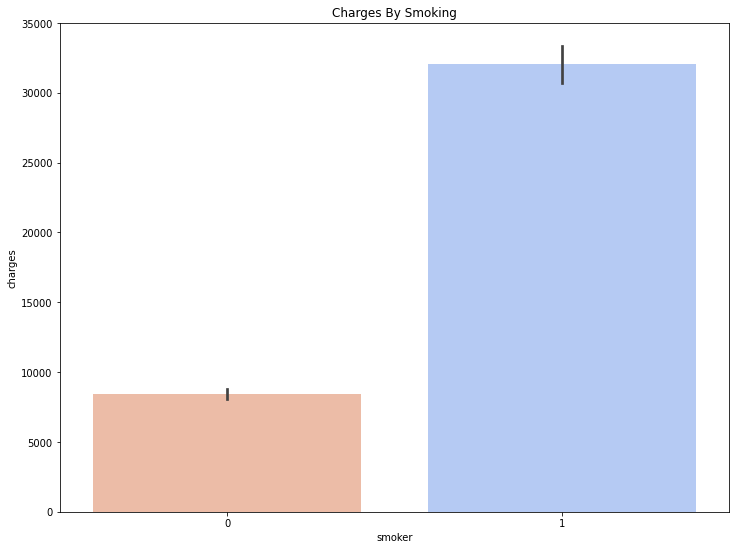

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Charges By Smoking')
sns.barplot(y=data.charges, x=data.smoker,palette="coolwarm_r")





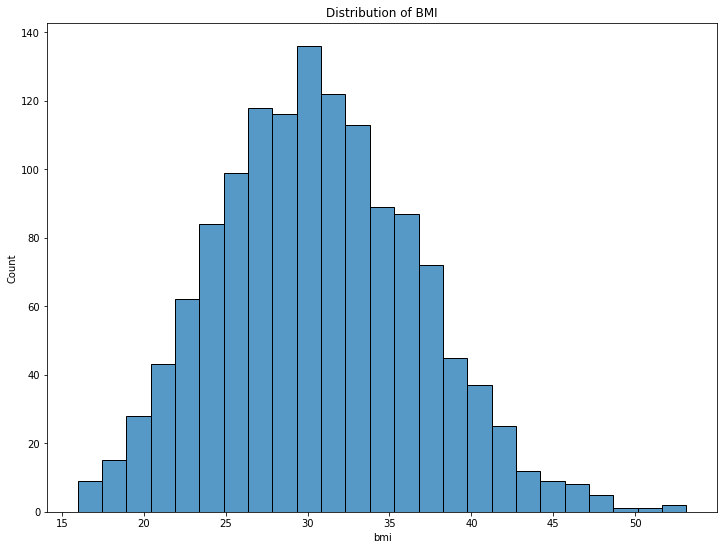

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Distribution of BMI')
sns.histplot(x='bmi', data= data, palette='coolwarm_r')




#LINEAR REGRESSION/DATA MODELLING

In [ ]:

#import libraries for linear regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


#Using LabelEncoder to convert the sex and region columns to numeric values

In [ ]:

labelencoder=LabelEncoder()
data["sex"]=labelencoder.fit_transform(data["sex"])
data["region"]=labelencoder.fit_transform(data["region"])
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#DATA SPLITTING

#Splitting the columns in the dataset by dropping the charges column from the rest and putting it in the x-axis
#And assigning the charges column only to y-axis


In [ ]:
x=data.drop(['charges'], axis=1)
y=data["charges"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
#To view the shape of our split data
x_train.shape


(1070, 6)

In [ ]:
y_train.shape

(1070,)

In [ ]:
x_test.shape

(268, 6)

In [ ]:
y_test.shape

(268,)

In [ ]:
lr = LinearRegression()
lr = lr.fit(x_train, y_train)
test_predict_value=lr.predict(x_test)
#test_predict_value


In [ ]:
#Comparing actual and predicted value
#comparison=pd.DataFrame({"Test value":y_test,"Predicted Value":test_predict_value})
#comparison

#R2_score (test) is 74%

In [ ]:
#test_r2score=r2_score(comparison["Test value"],comparison["Predicted Value"])
#test_r2score

In [ ]:
train_predict_value=lr.predict(x_train)

train_predict_value

array([11325.1895706 , 39168.19941267, 35897.23490849, ...,
        9815.53947035,  2725.89030268, 15292.09666984])

#R2_score (train) is 75%

In [ ]:
train_r2score = r2_score(y_train,train_predict_value)
train_r2score

0.7529603829842765

#Making an Example Prediction from the Model

In [ ]:
data = {'age':50, 'sex': 0, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
example_data = pd.DataFrame(data,index)
example_data

,age,sex,bmi,children,smoker,region
0,50,0,25,2,1,2


In [ ]:
cost_pred = lr.predict(example_data)
print("The medical insurance cost of the patient is: ", cost_pred)

The medical insurance cost of the patient is:  [33329.88044343]
